## Import libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


## Read the data

In [2]:
# Load the iris dataset
iris = pd.read_csv("./Iris.csv")
iris.head() # See the first 5 rows



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [26]:
#basic statistical information of the dataframe
iris.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Check for any missing values

In [5]:
iris.isna().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Splitting the data set into training (80%) and validation set (20%)

In [22]:
X = iris.iloc[:,[1,2,3,4]].values
Y = iris.iloc[:,5].values

(X_train, X_val, Y_train, Y_val) = train_test_split(X, Y, test_size=0.2, random_state=1)


## Model : Decision Tree 

In [33]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)


DecisionTreeClassifier()

## Evaluating model on validation set

In [32]:
y_pred = dtc.predict(X_val)
print(classification_report(Y_val, y_pred, target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(Y_val, y_pred)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30


Accuracy: 0.9667


## Visualizing decision tree

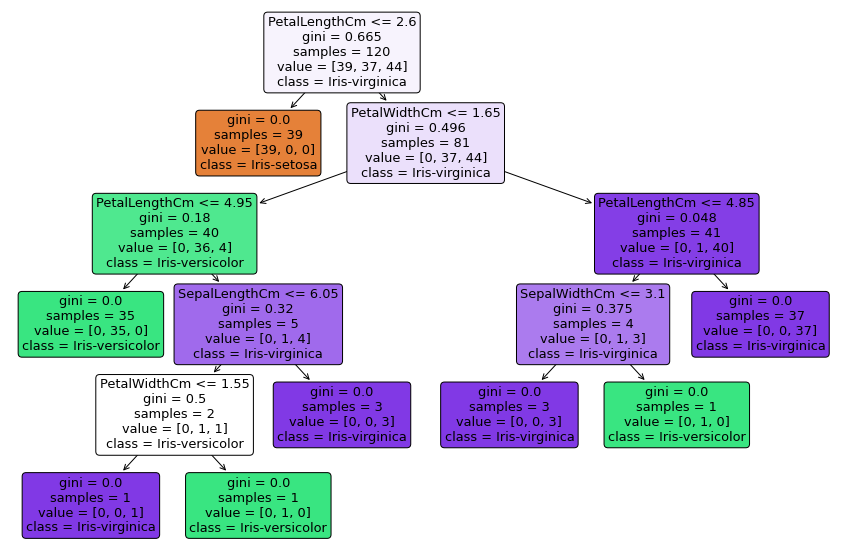

In [34]:
plt.figure(figsize=(15,10))
plot_tree(dtc,rounded=True,feature_names = list((iris.iloc[:,[1,2,3,4]]).columns),
          class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],
          filled=True)
plt.show()

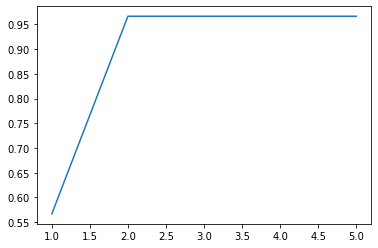

In [20]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_val, Y_val)
    accuracy.append(score)
plt.plot(max_depth_range,accuracy)
plt.show()